In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import joblib


In [3]:
IMG_SIZE = (32, 32)
BATCH_SIZE = 32

In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [5]:
train_generator = datagen.flow_from_directory(
    "C:/Users/acer/Desktop/skin_diseases/dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="training"
)

Found 472 images belonging to 5 classes.


In [6]:
val_generator = datagen.flow_from_directory(
    "dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="validation"
)

Found 116 images belonging to 5 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")  # 5 classes
])

c:\Users\acer\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
model.fit(train_generator, validation_data=val_generator, epochs=50)

c:\Users\acer\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2224 - loss: 1.5906

c:\Users\acer\anaconda3\envs\tensorflowgpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.2314 - loss: 1.5847 - val_accuracy: 0.2586 - val_loss: 1.5105
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.3430 - loss: 1.4882 - val_accuracy: 0.5086 - val_loss: 1.3793
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.4415 - loss: 1.3551 - val_accuracy: 0.5000 - val_loss: 1.2142
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.4537 - loss: 1.2629 - val_accuracy: 0.5172 - val_loss: 1.1896
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.5635 - loss: 1.1369 - val_accuracy: 0.5517 - val_loss: 1.1894
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5740 - loss: 1.1156 - val_accuracy: 0.6034 - val_loss: 1.0802
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5346 - loss: 1.1202 - val_accuracy: 0.5603 - val_loss: 1.0641
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5944 - loss: 0.9541 - val_accuracy: 0.5948 - val_

In [11]:
model.save("cnn_skin_disease_model1.h5")


In [12]:
joblib.dump(train_generator.class_indices, "class_labels1.pkl")

print("CNN Model and Labels Saved Successfully!")


CNN Model and Labels Saved Successfully!


Found 116 images belonging to 5 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8394 - loss: 0.5813
Validation Accuracy: 82.76%
Validation Loss: 0.6116
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Classification Report:
              precision    recall  f1-score   support

        Acne       0.67      0.75      0.71        16
    Hairloss       0.89      0.84      0.86        19
 Nail Fungus       0.81      0.96      0.88        27
      Normal       0.93      0.93      0.93        29
Skin Allergy       0.79      0.60      0.68        25

    accuracy                           0.83       116
   macro avg       0.82      0.82      0.81       116
weighted avg       0.83      0.83      0.82       116



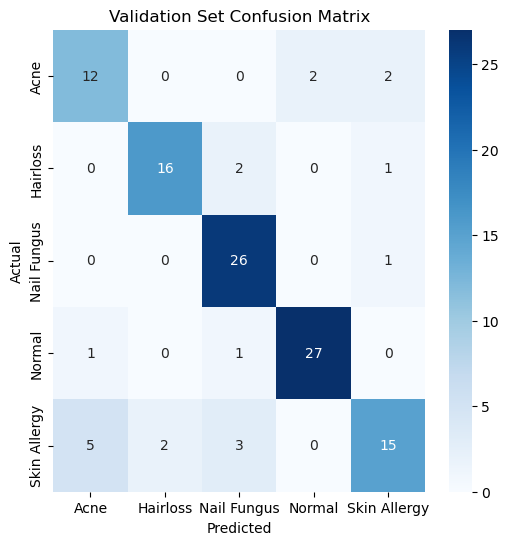

In [19]:
import tensorflow as tf
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Load trained CNN model and class labels
model = tf.keras.models.load_model("cnn_skin_disease_model1.h5")
class_labels = joblib.load("class_labels1.pkl")
labels_dict = {v: k for k, v in class_labels.items()}  # Reverse mapping

# Define image size and batch size
IMG_SIZE = (32, 32)
BATCH_SIZE = 32

# Load validation dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_generator = datagen.flow_from_directory(
    "dataset/train",  # Using train dataset with validation split
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="validation",  # Load validation data
    shuffle=False  # Keep order for confusion matrix
)

# Evaluate model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")

# Get predictions on validation data
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_names = list(labels_dict.values())

# Classification Report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Set Confusion Matrix")
plt.show()


In [1]:
import tensorflow as tf
import numpy as np
import joblib
from keras.preprocessing import image
from PIL import Image
import sys

# Load trained CNN model and class labels
model = tf.keras.models.load_model("cnn_skin_disease_model1.h5")
class_labels = joblib.load("class_labels1.pkl")
labels_dict = {v: k for k, v in class_labels.items()}  # Reverse mapping

# Function to preprocess image for prediction
def preprocess_image(img_path):
    img = Image.open(img_path).convert("RGB")  # Open and convert to RGB
    img = img.resize((32, 32))  # Resize to match model input size
    img = image.img_to_array(img) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

if len(sys.argv) < 2:
    print("Usage: python test_cnn.py <image_path>")
    sys.exit(1)

img_path = "C:/Users/acer/Desktop/skin_diseases/dataset/test/Hairloss/5 (5).jpg"  # Manually set the image path



# Preprocess and predict
processed_img = preprocess_image(img_path)
prediction = model.predict(processed_img)
predicted_class = labels_dict[np.argmax(prediction)]

print(f"Predicted Skin Disease: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Predicted Skin Disease: Hairloss


In [2]:
import tensorflow as tf
import numpy as np
import joblib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load trained CNN model and class labels
model = tf.keras.models.load_model("cnn_skin_disease_model1.h5")
class_labels = joblib.load("class_labels1.pkl")
labels_dict = {v: k for k, v in class_labels.items()}  # Reverse mapping

# Define image size and batch size
IMG_SIZE = (32, 32)
BATCH_SIZE = 32

# Load test dataset
datagen = ImageDataGenerator(rescale=1./255)

test_generator = datagen.flow_from_directory(
    "C:/Users/acer/Desktop/skin_diseases/dataset/test",  # Replace with your test dataset path
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    shuffle=False  # Keep order for confusion matrix
)



Found 166 images belonging to 5 classes.


In [3]:
# Evaluate model on test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")



c:\Users\acer\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9490 - loss: 0.2123
Test Accuracy: 95.78%
Test Loss: 0.1852


In [4]:
# Predict labels
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_names = list(labels_dict.values())



6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step 


In [5]:
# Classification Report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))




Classification Report:
              precision    recall  f1-score   support

        Acne       0.96      0.88      0.92        25
    Hairloss       0.94      1.00      0.97        31
 Nail Fungus       1.00      0.97      0.98        32
      Normal       0.98      1.00      0.99        45
Skin Allergy       0.91      0.91      0.91        33

    accuracy                           0.96       166
   macro avg       0.96      0.95      0.95       166
weighted avg       0.96      0.96      0.96       166



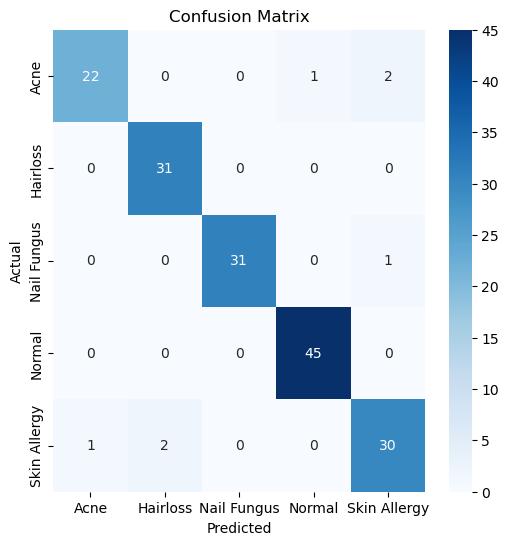

In [6]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()